## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 11 : Algoritma Densitas dan Asosiatif </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
import datetime
import uuid

myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-05-11 08:17:21.265686
Device ID: 	942230df-ef99-11ed-8757-088fc3234331



---

### Dataset yang dipakai:

1. Credit Card customers – sumber : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
2. Market_Basket_Optimisation – sumber : https://www.kaggle.com/datasets/parisanahmadi/market-basket-optimisation

---

### Hasil kerja

### Density Algorithm: DBSCAN

#### Importing library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3), 
                x_off=(0, 50), y_off=(0, 50)):
    
    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the x-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction
    
    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    # Genereate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
     
    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    
    # Return cluster positions
    return clusters_x, clusters_y

#### Generate some clusters

In [4]:
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)

#### Convert to a single dataset in OpenCV format

In [5]:
data = np.float32((np.concatenate(clusters_x),
                  np.concatenate(clusters_y))).transpose()

#### Define max_distance (eps parameter in DBSCAN)

In [6]:
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)

#### Extract a mask of core cluster members

In [7]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

#### Extract labels (-1 is used for outliers) 

In [8]:
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

#### Plot the result

<Axes: >

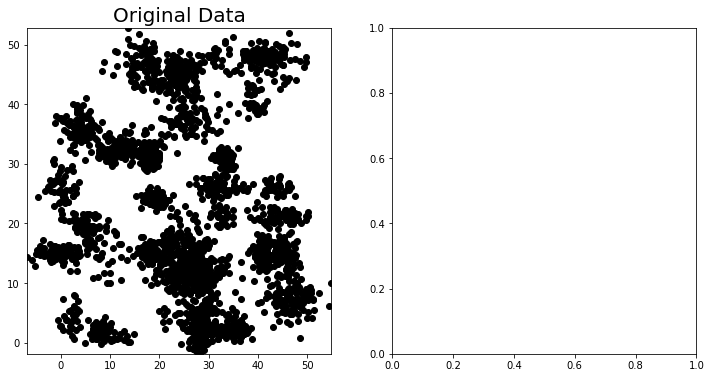

In [9]:
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(data[:,0], data[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

plt.subplot(122)

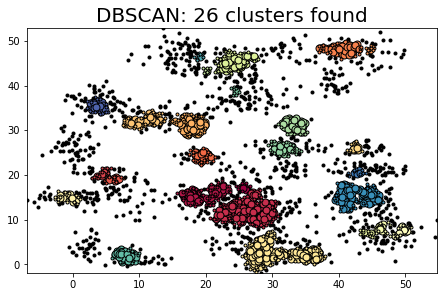

In [10]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

### DBSCAN algorithm for clustering customer behavior

#### Import libraries

In [11]:
import numpy as np
import pandas as pd

import os
#print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [12]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [14]:
# Drop Last 2 Columns
df = df.drop(df.columns[-2:], axis=1)

In [15]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [16]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

<Axes: xlabel='Gender', ylabel='Credit_Limit'>

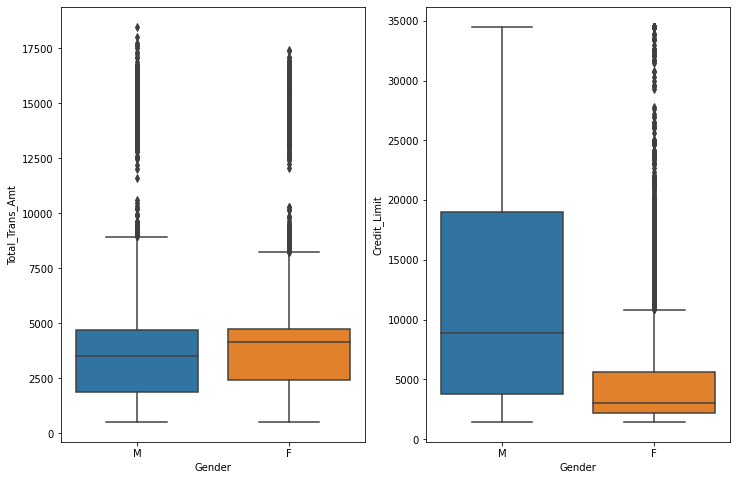

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x="Gender", y="Total_Trans_Amt", data=df, orient='v', ax=axes[0])
sns.boxplot(x="Gender", y="Credit_Limit", data=df, orient='v', ax=axes[1])

In [18]:
df_group_one = df[['Gender', 'Total_Trans_Amt', 'Credit_Limit']]
df_group_one.groupby(['Gender'], as_index=False).mean()

,Gender,Total_Trans_Amt,Credit_Limit
0,F,4324.318216,5023.854274
1,M,4493.706228,12685.674963


In [21]:
df_female = df[df['Gender'] == "F"]
print(df_female.shape)
df_female.head()

(5358, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
14,712396908,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,...,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,...,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000


In [22]:
Percentage = (df_female.shape[0]/df.shape[0])*100
print('Female Percentage: ', round(Percentage), '%')

Female Percentage:  53 %


#### Compute DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_female[['Customer_Age', 'Total_Trans_Amt', 'Credit_Limit']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_female['Clus_Db'] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

# A sample of clusters
print(df_female[['Customer_Age', 'Total_Trans_Amt', 'Credit_Limit', 'Clus_Db']].head())

# Number of labels
print('number of labels: ', set(labels))

    Customer_Age  Total_Trans_Amt  Credit_Limit  Clus_Db
1             49             1291        8256.0        0
3             40             1171        3313.0        0
14            57             1570        2436.0        0
19            45             1207       14470.0        0
21            62              692        1438.3        0
number of labels:  {0, 1, 2, 3, 4, 5, 6, 7, -1}


#### Visualize Data

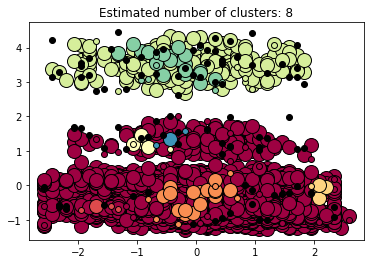

number of noise(s):  97


In [25]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    
    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)
    
    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)
        
plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [28]:
for clust_number in set(labels):
    clust_set = df_female[df_female.Clus_Db == clust_number]
    if clust_number != -1:
        print('Cluster '+str(clust_number)+', Avg Age: '+ str(round(np.mean(clust_set.Customer_Age)))+\
             ', Avg Transaction Amount: '+ str(round(np.mean(clust_set['Total_Trans_Amt'])))+\
             ', Avg Credit Limit: '+ str(round(np.mean(clust_set['Credit_Limit'])))+\
             ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age: 46, Avg Transaction Amount: 3700, Avg Credit Limit: 4351, Count: 4971
Cluster 1, Avg Age: 34, Avg Transaction Amount: 2404, Avg Credit Limit: 34516, Count: 4
Cluster 2, Avg Age: 46, Avg Transaction Amount: 3278, Avg Credit Limit: 33548, Count: 22
Cluster 3, Avg Age: 63, Avg Transaction Amount: 3938, Avg Credit Limit: 16824, Count: 5
Cluster 4, Avg Age: 40, Avg Transaction Amount: 7906, Avg Credit Limit: 23211, Count: 6
Cluster 5, Avg Age: 46, Avg Transaction Amount: 14588, Avg Credit Limit: 5845, Count: 222
Cluster 6, Avg Age: 43, Avg Transaction Amount: 14698, Avg Credit Limit: 15080, Count: 27
Cluster 7, Avg Age: 42, Avg Transaction Amount: 8374, Avg Credit Limit: 19381, Count: 4


# Association Learning – Apriori Algorithm 

In [68]:
dataset = pd.read_csv("Market_Basket_Optimisation.csv")
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
dataset.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

#### Clean Data

In [70]:
# replacing empty value
dataset.fillna('', inplace=True)

In [72]:
food = []
for i in range(len(dataset)):
    food.append(dataset.values[i, :])

#### Transform the dataset

In [73]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(food).transform(food)
df = pd.DataFrame(te_ary, columns=te.columns_)
df 

,,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Set the items and itemsets with at least 20% support

In [84]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.1)

,support,itemsets
0,1.000000,(0)
1,0.163867,(26)
2,0.179733,(38)
3,0.170933,(44)
4,0.132000,(55)
5,0.129600,(72)
6,0.238267,(73)
7,0.174133,(101)
8,0.163867,"(0, 26)"
9,0.179733,"(0, 38)"


In [85]:
apriori(df, min_support=0.1, use_colnames=True)

,support,itemsets
0,1.000000,()
1,0.163867,(chocolate)
2,0.179733,(eggs)
3,0.170933,(french fries)
4,0.132000,(green tea)
5,0.129600,(milk)
6,0.238267,(mineral water)
7,0.174133,(spaghetti)
8,0.163867,"(, chocolate)"
9,0.179733,"(, eggs)"


#### Selecting and Filtering Result for the dataset

In [86]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,1.000000,(),1
1,0.163867,(chocolate),1
2,0.179733,(eggs),1
3,0.170933,(french fries),1
4,0.132000,(green tea),1
5,0.129600,(milk),1
6,0.238267,(mineral water),1
7,0.174133,(spaghetti),1
8,0.163867,"(, chocolate)",2
9,0.179733,"(, eggs)",2


#### select the results that satisfy our desired criteria as follows :

In [89]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.1) ]

,support,itemsets,length
8,0.163867,"(, chocolate)",2
9,0.179733,"(, eggs)",2
10,0.170933,"(, french fries)",2
11,0.132000,"(, green tea)",2
12,0.129600,"(, milk)",2
13,0.238267,"(, mineral water)",2
14,0.174133,"(, spaghetti)",2


#### Similarly, we can select entries based on the itemsets.

In [92]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
1,0.163867,(chocolate),1


# Association Learning – FP Growth Algorithm 

In [93]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.2)

,support,itemsets
0,1.000000,(0)
1,0.238267,(73)
2,0.238267,"(0, 73)"


In [95]:
fpgrowth(df, min_support=0.2, use_colnames=True)

,support,itemsets
0,1.000000,()
1,0.238267,(mineral water)
2,0.238267,"(, mineral water)"


#### Apriori Vs FP Growth

In [97]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(food).transform(food)
df = pd.DataFrame(te_ary, columns = te.columns_)

In [98]:
from mlxtend.frequent_patterns import apriori

%timeit -n 100 -r 10 apriori(df, min_support=0.2)

2.87 ms ± 532 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [99]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 100 -r 10 fpgrowth(df, min_support=0.2)

26.6 ms ± 382 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Dataset yang digunakan adalah data Credit Card customers dan Market_Basket_Optimisation. Dataset 1 memiliki data tipe kategori dan numerikal. Dataset 2 memiliki data kategorikal saja.
    - Dalam melakukan DBSCAN Clustering (Density Based Spatial Clustering of Applications with Noise) untuk mengelompokkan data set yang memiliki cluster dengan kepadatan yang sama. Dari hasil clustering dengan menggunakan DBSCAN seperti yang telah dilakukan di atas, kita dapat melihat bahwa Cluster 6 dengan rata-rata usia 43 tahun memiliki rata-rata transaction amount paling banyak dan Cluster 1 dengan rata-rata usia 34 tahun memiliki rata-rata credit limit paling banyak.
    - Pada bagian akhir, dapat dilihat perbandingan antara FP Growth dan Algoritma Apriori, di mana Apriori memiliki kecepatan yang lebih tinggi dibandingkan dengan Fp Growth.

---

In [100]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Time-stamp:	2023-05-17 15:15:10.653229


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [101]:
!jupyter nbconvert --to html "./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week11.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week11.ipynb to html
[NbConvertApp] Writing 932198 bytes to IF540_KelasEL_00000053580_RendyWirawanTamrin_Week11.html
